<a href="https://colab.research.google.com/github/coderBylove/FoodHub_Data_Analysis/blob/main/Project_FoodHub_FullCode_Arnab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [ ]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# assign the path of the dataset file
dataset_path = "/content/drive/MyDrive/Dataset/foodhub_order.csv"
# read the data
df_orders = pd.read_csv(dataset_path)
#To prevent any potential manipulation of the original dataset, we will create a duplicate copy.
df= df_orders.copy()
# To check if the data has been loaded correctly, we can view the first 5 and last 5 rows.
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:

The DataFrame has 9 columns. Data in each row corresponds to the order placed by a customer.

### Rows and columns are present in the data

In [ ]:
# shape attribute will returns the dimension of the object
df.shape

(1898, 9)

#### Observations:
*   The dataset contains 1898 rows and 9 columns




###  The datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 4 columns with datatype object, 5 numerical columns (4 columns are int64, and 1 column is float64)
*   There are no null values in the dataset
*   The "*rating*" column has some non-numeric values, the data dictionary says the rating given by the customer is out of 5, but the column datatype is an object that implies it contains some non-numeric values





### Missing values in the data? If yes, treating them using an appropriate method.

In [ ]:
# check dataframe missing value using isnull and then sum all the values
df.isnull().sum(axis=0)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# Checking if any value in the DataFrame is missing
df.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

In [ ]:
# checking for duplicate entries in data
df.duplicated().sum()

0

In [ ]:
# For a better understanding of the data anomaly, let's check the unique values in the 'rating' column
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Find the restaurant that has the highest number of unrated reviews
df[df.rating=="Not given"]['restaurant_name'].value_counts(normalize=True)

Shake Shack                    0.116848
The Meatball Shop              0.065217
Blue Ribbon Sushi              0.062500
Blue Ribbon Fried Chicken      0.043478
Parm                           0.039402
                                 ...   
The Loop                       0.001359
Schnipper's Quality Kitchen    0.001359
Go! Go! Curry!                 0.001359
Market Table                   0.001359
Amy Ruth's                     0.001359
Name: restaurant_name, Length: 134, dtype: float64

#### Observations:
*   There are no null or missing values in the dataset
*   However *rating* column have some non-numeric values which need to be explored further and might need to treated for better analysis
*   There are no duplicate entries in the dataset




### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed.

In [ ]:
# using describe() to generate descriptive statistics for all columns
df.describe(include="all").T
# transpose for better readability

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

*   Initially, the columns order_id and customer_id can be ignored from descriptive statistical analysis since they are identifiers.
*   The restaurant '*Shake Shack*' receives the highest number of orders.
*   There are 178 restaurants from where orders are placed
*   The most popular cuisine is '*American*'
*   Average cost of orders is \$16.5 order placed are in range of \$4.47 to \$35.41
*   Most orders are placed during *Weekends*
*   **Average food preparation time is 27.37 minutes, the minimum time for food preparation is 20 minutes and the maximum time is 35 minutes**
*   On average it takes around 24 mins to deliver an order, the time range from 15 mins to 33 mins
*   When a rating is not provided by customers, it will be indicated as '*Not given*'.










### How many orders are not rated

In [ ]:
# Used value_counts() to find the unique values and the frequency of rating
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#check the relative frequencies of the unique values in rating
df.rating.value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:

*   **Count of Orders not rated is 736**
*   There are 588 orders rated 5, 386 orders rated 4, and 3 orders rated 188.
*   About 39% of the orders are not rated.
*   Data imputation may be possible on *ratings* as more than 50% of the data is available, but incorrect customer feedback for a restaurant could result.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

###  Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
# Find the list of the columns and separate them into distinct categories
cols_all = df.columns.to_list()
print(f'All Columns = {cols_all}')
# Selecting the columns which are defined categorical in the dataset
cols_categorical = df.select_dtypes(include=["object"]).columns.tolist()
print(f'Columns with Categorical Data = {cols_categorical}')
# Selecting the columns which are defined numerical in the dataset
cols_numerical = df.select_dtypes(exclude=["object"]).columns.tolist()
print(f'Columns with Numerical Data = {cols_numerical}')

All Columns = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']
Columns with Categorical Data = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
Columns with Numerical Data = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']


In [ ]:
# Generate the count and frequency of unique values for the categorical columns.
for col_name in cols_categorical:
  print(f'Column Name: {col_name}')
  print("-"*30)
  new_df = pd.DataFrame({
      "Value_Counts": df[col_name].value_counts(),
      "Frequency": df[col_name].value_counts(normalize=True)
  })
  print(new_df)
  print("*"*70)

Column Name: restaurant_name
------------------------------
                           Value_Counts  Frequency
Shake Shack                         219   0.115385
The Meatball Shop                   132   0.069547
Blue Ribbon Sushi                   119   0.062698
Blue Ribbon Fried Chicken            96   0.050580
Parm                                 68   0.035827
...                                 ...        ...
Sushi Choshi                          1   0.000527
Dos Caminos Soho                      1   0.000527
La Follia                             1   0.000527
Philippe Chow                         1   0.000527
'wichcraft                            1   0.000527

[178 rows x 2 columns]
**********************************************************************
Column Name: cuisine_type
------------------------------
                Value_Counts  Frequency
American                 584   0.307692
Japanese                 470   0.247629
Italian                  298   0.157007
Chinese         

#### Observations on Categorical Variables:

*  Here are the top 5 restaurants with the percentage of orders placed: Shake Shack (11.5%), The Meatball Shop (6.95%), Blue Ribbon Sushi (6.2%), Blue Ribbon Fried Chicken (5%), and Parm (3.5%).
*  The top five most popular cuisines in order, are American, Japanese, Italian, Chinese, and Mexican.
*  71% of orders are placed on weekends, while the remaining 29% are placed on weekdays.


*In the following sections, we will take a closer look at every column presented in the data set. We will analyze and discuss the contents of each column individually, highlighting any significant findings and insights. Through this detailed examination of each column, we aim to gain a deeper understanding of the data and the patterns it contains.*

In [ ]:
## Combining the histogram and box plot
  # Purpose: Can lead to a more comprehensive analysis of data
  # Params:
    # data: dataframe
    # feature: dataframe column
    # figsize: size of figure (default (12,7))
    # kde: whether to show the density curve (default False)
    # title: To set the title for the plots
    # stat: below are the values
        # count: show the number of observations in each bin
        # frequency: show the number of observations divided by the bin width
        # probability or proportion: normalize such that bar heights sum to 1
        # percent: normalize such that bar heights sum to 100
        # density: normalize such that the total area of the histogram equals 1
    # bins: number of bins for histogram (default None)
    # fmt: format for the bar label accepted values are %g, %f, %d, %.2f%%
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, title="", stat="count", bins=None, fmt="%d"):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    ax_box2.set_title(title)
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, meanprops={"markerfacecolor": "purple"})

    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bin, stat=stat)
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, stat=stat)  # For histogram

    ax_hist2.axvline(data[feature].mean(), color="purple", linestyle="--")  # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

    for container in ax_hist2.containers:
      ax_hist2.bar_label(container, fontsize=8, fmt=fmt)


#### Observations on Order Id

In [ ]:
# check for the number of unique orders placed
order_placed = df["order_id"].nunique()
print(f'Total number of order placed = {order_placed}')

Total number of order placed = 1898


- The total number of orders placed through the app is 1898

#### Observations on Customer Id

In [ ]:
# check the number of unique customers
num_cumstomer = df["customer_id"].nunique()
print(f'Total number of customer = {num_cumstomer}')

Total number of customer = 1200


- There are 1200 customers who place orders via the app

#### Observations on Restaurant Name

In [ ]:
# Find the number of unique restaurants and identify the restaurants that have received the most and least number of orders.
num_resturant = df["restaurant_name"].nunique()
print(f'Total number of restaurant = {num_resturant}')

# Get the top restaurants to receive orders
print('\nTop 5 Restaurants to receive maximum order')
print(df["restaurant_name"].value_counts().head(5))
# Get the restaurants to receive minimum orders
print('\n5 Restaurants to receive minimum order')
print(df["restaurant_name"].value_counts().tail(5))

Total number of restaurant = 178

Top 5 Restaurants to receive maximum order
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

5 Restaurants to receive minimum order
Sushi Choshi        1
Dos Caminos Soho    1
La Follia           1
Philippe Chow       1
'wichcraft          1
Name: restaurant_name, dtype: int64


In [ ]:
# Group the restaurant based on the order
top_10_restaurants = df.groupby("restaurant_name").nunique().sort_values(by="order_id", ascending=False).reset_index().head(10)
# Get the series of top 10 restaurant name
top_10_restaurants_name = top_10_restaurants["restaurant_name"]
# Create a dataframe that contains the top 10 restaurant based on there orders
df_top_10_restaurants = df[df["restaurant_name"].isin(top_10_restaurants_name)].copy()

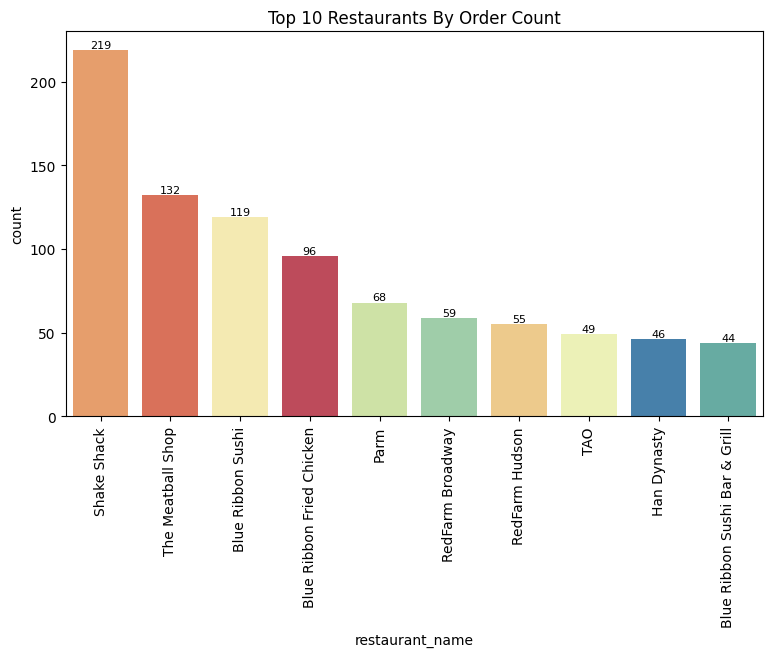

In [ ]:
#Plot the top 10 restaurants based on the number of orders placed
plt.figure(figsize=(9,5))
plt.title("Top 10 Restaurants By Order Count")
plt.xticks(rotation=90)
ax = sns.countplot(data=df_top_10_restaurants, x="restaurant_name", hue="restaurant_name", palette="Spectral", order = df_top_10_restaurants['restaurant_name'].value_counts().index)
for container in ax.containers:
  ax.bar_label(container, fontsize=8)

- There are 178 restaurants associated with the app.
- The two most popular restaurants selling well are *Shake Shack* and *The Meatball Shop*.
- The above plot represents the top 10 restaurants based on the number of orders placed

#### Observations on Cuisine Type

In [ ]:
# Get the unique cuisine type available
num_cuisine = df["cuisine_type"].nunique()
print(f'Number of cuisines available to order= {num_cuisine}')

Number of cuisines available to order= 14


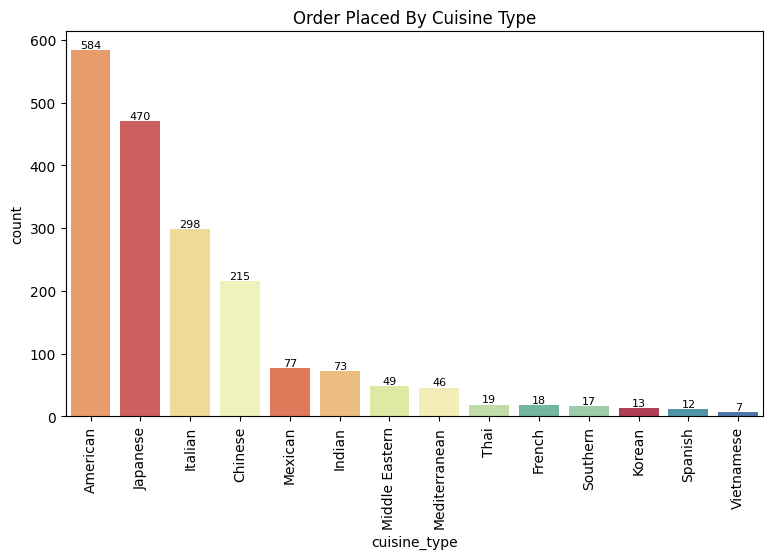

In [ ]:
#Plot the cuisine type to compare the counts
plt.figure(figsize=(9,5))
plt.title("Order Placed By Cuisine Type")
plt.xticks(rotation=90)
ax = sns.countplot(data=df, x="cuisine_type", hue="cuisine_type", order = df['cuisine_type'].value_counts().index, palette="Spectral")
for container in ax.containers:
  ax.bar_label(container, fontsize=8)

- There are 14 different types of cuisine available to order.
- The plot above displays the popularity of different cuisines based on the number of orders placed for each cuisine.
- Over 50% of the orders placed include a combination of American and Japanese cuisine.


#### Observations on Cost Of The Order

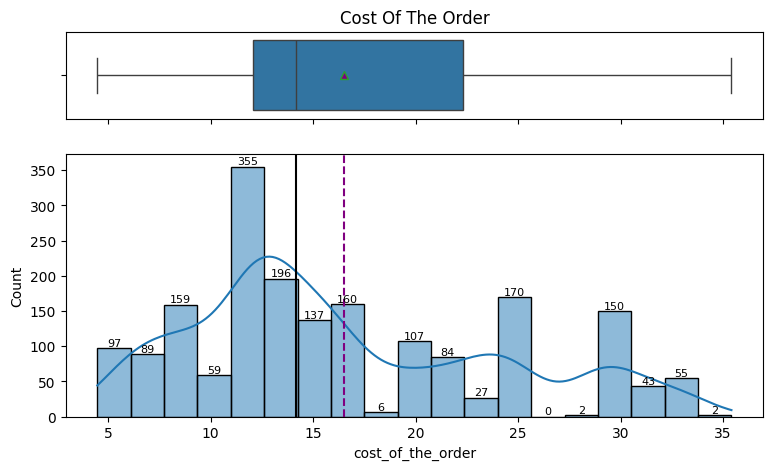

In [ ]:
#Plot to see cost of each order
histogram_boxplot(df,'cost_of_the_order', kde=True, figsize=(9,5), title="Cost Of The Order")

- There are no outliers in the data
- The cost per order is slightly right skewed
- The majority of the prices for the orders are under $16.50


#### Observations on Day Of The Week

In [ ]:
# Get the unique day of the week available
num_day_of_the_week = df["day_of_the_week"].nunique()
print(f'Days of the week available = {num_day_of_the_week}')

Days of the week available = 2


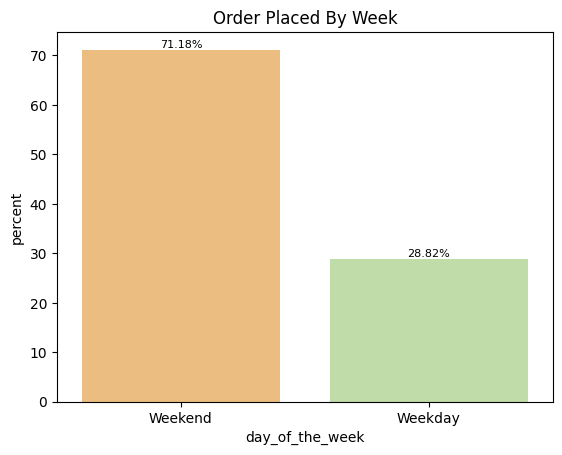

In [ ]:
# Plot the day of the week to compare the percentage of orders placed
plt.title("Order Placed By Week")
ax = sns.countplot(data=df, x="day_of_the_week", hue="day_of_the_week", order = df['day_of_the_week'].value_counts().index, palette="Spectral", stat="percent");
for container in ax.containers:
  ax.bar_label(container, fontsize=8, fmt="%.2f%%")

- Day of the weeks are categorized into 2 parts, Weekend and Weekday.
- Major orders are typically placed over the weekends, accounting for around 70% of the total orders.

#### Observations on Rating

In [ ]:
# Get the unique rating available
num_rating = df["rating"].nunique()
print(f'Number of unique ratings = {num_rating}')

Number of unique ratings = 4


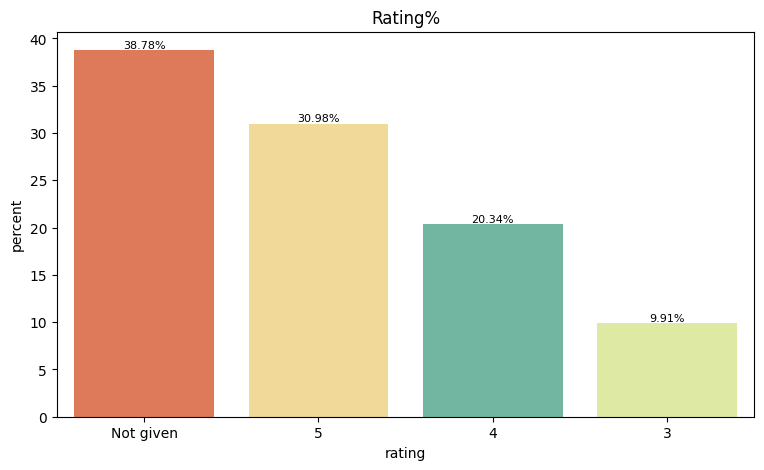

In [ ]:
# Plot the rating to compare the counts
plt.figure(figsize=(9,5))
plt.title("Rating%")
ax= sns.countplot(data=df, x="rating", hue="rating", order = df['rating'].value_counts().index, palette="Spectral", stat="percent");
for container in ax.containers:
  ax.bar_label(container, fontsize=8, fmt="%.2f%%")

In [ ]:
# Getting all the restaurant where rating is available
df_filter_rated = df[df["rating"] !="Not given"].copy()
# Convert the rating column from object to integer
df_filter_rated["rating"] = df_filter_rated['rating'].astype(int)

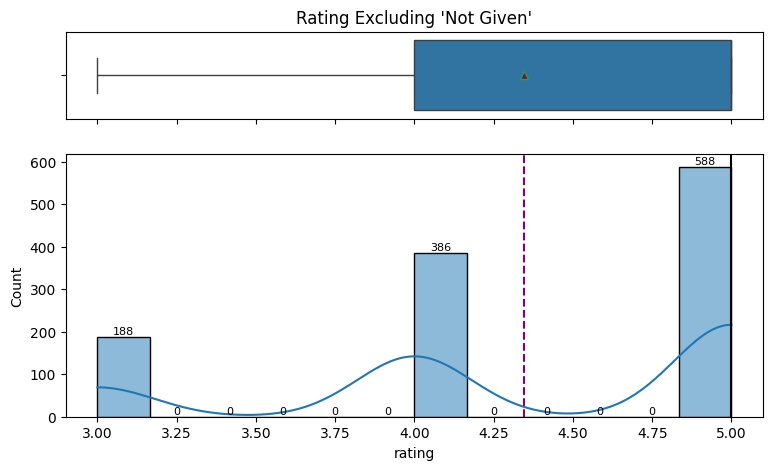

In [ ]:
histogram_boxplot(df_filter_rated,'rating', kde=True, figsize=(9,5), title="Rating Excluding 'Not Given'")

- It should be noted that users have not provided 39% of the ratings.
- The user has given a minimum rating of 3.

#### Observations on Food Preparation Time

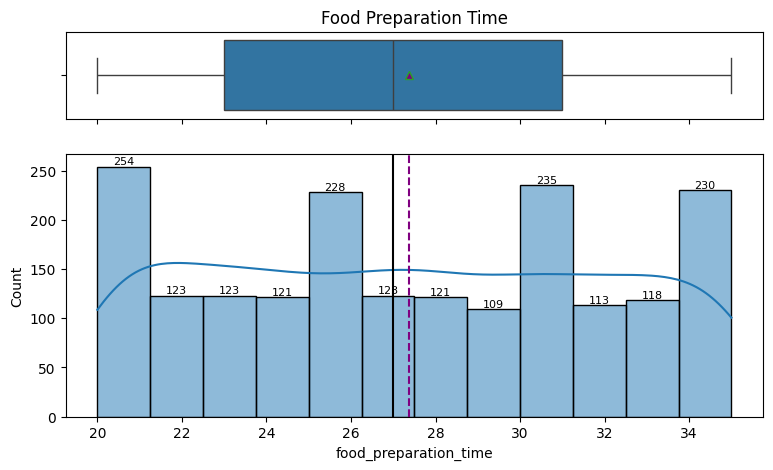

In [ ]:
histogram_boxplot(df,'food_preparation_time', kde=True, figsize=(9,5), title="Food Preparation Time")

- The distribution is almost symmetrical.
- There are no outliers in the data.
- 50% of the orders are prepared within 27 minutes.

#### Observations on Delivery Time

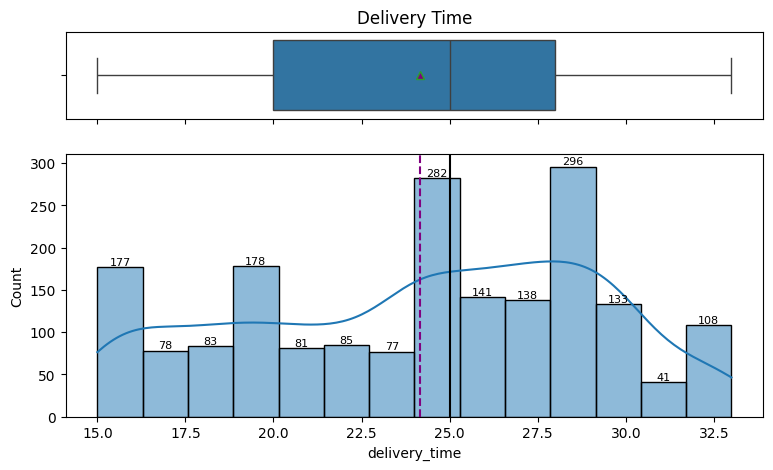

In [ ]:
histogram_boxplot(df,'delivery_time', kde=True, figsize=(9,5), title="Delivery Time")

- The delivery_time distribution is slightly left skewed.
- There are no outliers in the data.
- The distribution is similar to food_preparation_time. It suggests a possible correlation.
- 50% of the orders are delivered in within 25 minutes


 ###  The top 5 restaurants in terms of the number of orders received

In [ ]:
# Group the restaurant by name and find unique order count placed in the restaurant
top_5_restaurants=df_orders.groupby("restaurant_name").nunique().sort_values(by="order_id", ascending=False)[["order_id"]].head(5)
top_5_restaurants

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
# Get the top restaurants to receive orders
print('\nTop 5 Restaurants in terms of order')
print(df["restaurant_name"].value_counts(normalize=True).head(5))


Top 5 Restaurants in terms of order
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
Name: restaurant_name, dtype: float64


#### Observations:
* Here are the top 5 restaurants along with the percentage of orders they have received:
    1. Shake Shack (11.5%)
    2. The Meatball Shop (6.95%)
    3. Blue Ribbon Sushi (6.2%)
    4. Blue Ribbon Fried Chicken (5%)
    5. Parm (3.5%)

### Most popular cuisine on weekends

In [ ]:
# Filtering the data to get the weekend orders only
weekend_orders = df_orders[df_orders["day_of_the_week"] == "Weekend"]

In [ ]:
# Sorting the top 5 cuisines of the weekends based on orders placed
top_5_cuisine_types = weekend_orders["cuisine_type"].value_counts().head(5)
print('\nTop 5 cuisine ordered during weekend')
print(top_5_cuisine_types)


Top 5 cuisine ordered during weekend
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


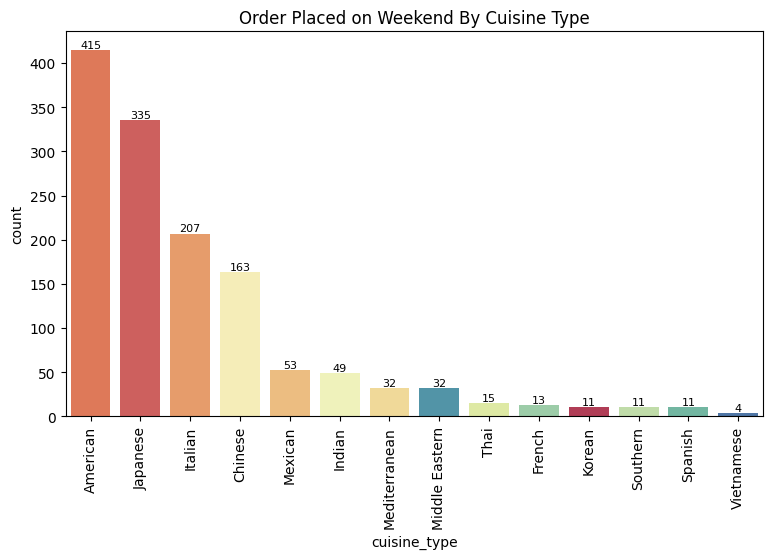

In [ ]:
# Plot the cuisine-based count for weekend orders
plt.figure(figsize=(9,5))
plt.title("Order Placed on Weekend By Cuisine Type")
plt.xticks(rotation=90)
ax = sns.countplot(data=weekend_orders, x="cuisine_type", hue="cuisine_type", order = weekend_orders['cuisine_type'].value_counts().index, palette="Spectral");
for container in ax.containers:
  ax.bar_label(container, fontsize=8)

#### Observations:
*  **The most popular cuisine on the weekend is *American***
*  Followed closely by Japanese, Italian, and Chinese cuisine.



### Percentage of the orders cost more than 20 dollars

In [ ]:
# Filtering data to get the orders which cost more than $20
df_greater_20 = df[df['cost_of_the_order'] > 20]

In [ ]:
# get the number of orders which cost more than $20
num_order_greater_20 = df_greater_20.shape[0]
# get the total number of orders placed
total_order = df.shape[0]

percent_order_greater_20 = (num_order_greater_20/total_order) * 100
print(f"Percentage of orders above 20 dollars: {round(percent_order_greater_20,2)}%")

Percentage of orders above 20 dollars: 29.24%


#### Observations:


*  Approximately 29.2% of the orders have a cost of more than $20.


### The mean order delivery time

In [ ]:
mean_delivery_time = df["delivery_time"].mean()
print(f"Average delivery time={round(mean_delivery_time,2)} minutes")

Average delivery time=24.16 minutes


#### Observations:


*  The mean delivery time for orders is 24.16 minutes.



### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Get the counts of orders placed by customers based on their IDs
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* Here is a breakdown of the top 3 customers with the highest number of orders, including their IDs:
  1. Customer ID *52832* has placed a total of *13* orders.
  2. Customer ID *47440* has made *10* orders in total.
  3. Customer ID *83287* has made *9* orders so far.

### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


#### Correlation among Numerical Variables

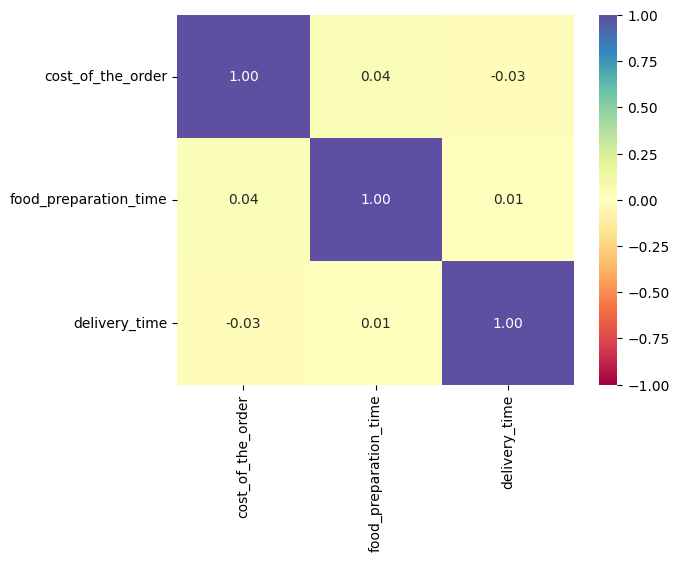

In [ ]:
# Plot the heatmap for the numerical fields
cols_numerical = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
# get the correlation matrix of the numerical fields
df_food_corr = df[cols_numerical].corr()
sns.heatmap(df_food_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

In [ ]:
# Filtering all the restaurant where rating is available
df_filter_rated = df[df["rating"] !="Not given"].copy()
# Convert the rating column from object to integer
df_filter_rated["rating"] = df_filter_rated['rating'].astype(int)

<Axes: >

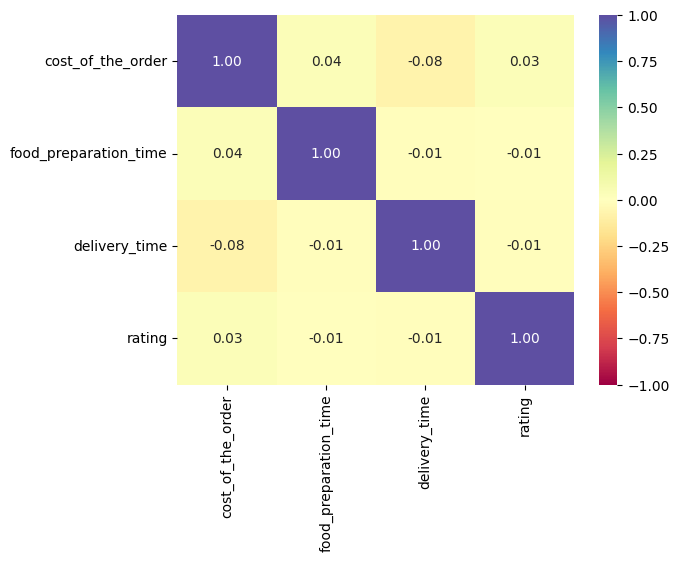

In [ ]:
# Plot the heatmap including the orders that have rating
cols_numerical = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
# get the correlation matrix
df_food_corr = df_filter_rated[cols_numerical].corr()
# Plot
sns.heatmap(df_food_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

##### Observations:
- There does not seem to be a strong relationship between the numerical columns.
- Cost of the order would be negatively correlated with delivery time

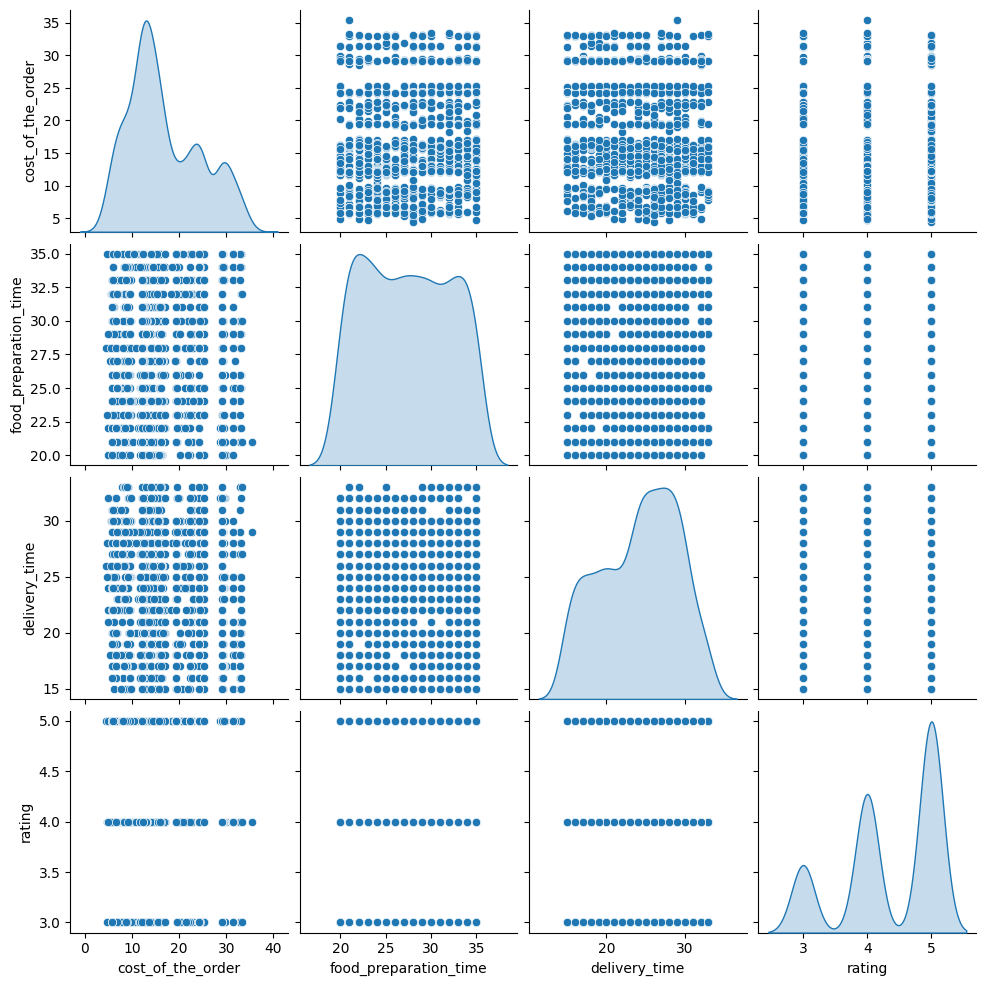

In [ ]:
# plot the pairplot to confirm on the above observation
sns.pairplot(data=df_filter_rated[cols_numerical], diag_kind="kde");

##### Observations:
- We get the same insights from the correlation plot.
- There does not seem to be a strong relationship between the numerical variables.

*In the upcoming sections, we will delve deeper into exploring the intricate relationship between two categorical variables and one numerical variable while also considering the impact of another categorical variable. Specifically, we will take a closer look at how these variables interact with each other, the patterns that emerge, and any notable trends or insights that can be gleaned from the data.*

#### Relationship between Cuisine and Cost of the order

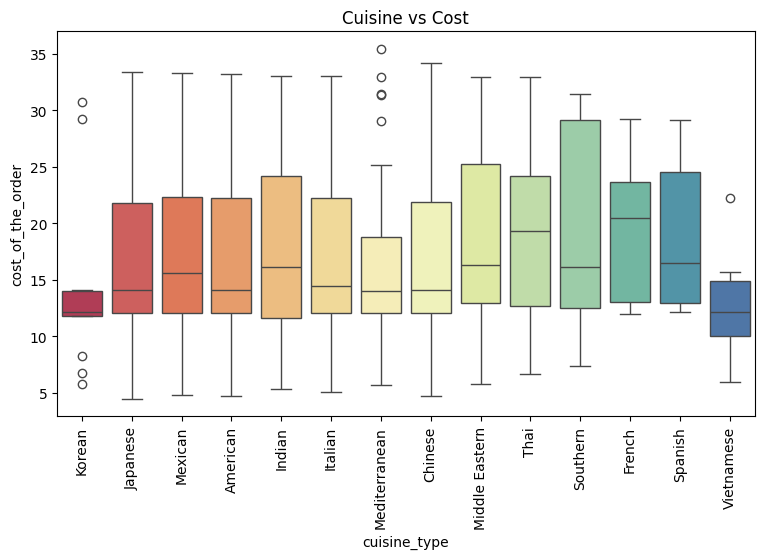

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Cost")
plt.xticks(rotation=90)
# plot cuisine and cost
sns.boxplot(x="cuisine_type", y="cost_of_the_order", hue="cuisine_type", data=df, palette="Spectral");

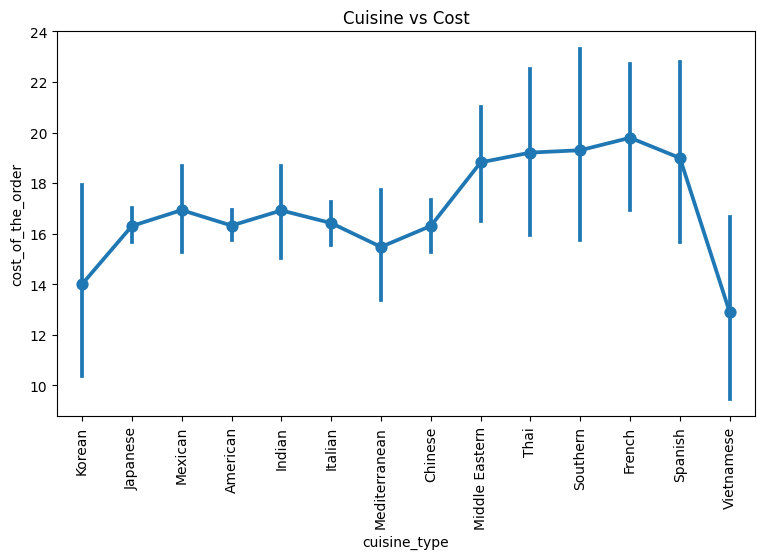

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Cost")
plt.xticks(rotation=90);
# plot cuisine and cost in point plot for measuring the central tendency
sns.pointplot(x="cuisine_type", y="cost_of_the_order", data=df)
plt.show()

##### Observations:
- On average *Korean and Vietnamese* cuisine are cheaper than other cuisines
- On average *French* cuisine is pricer than other cuisines

#### Relationship between Cuisine and Food Preparation time

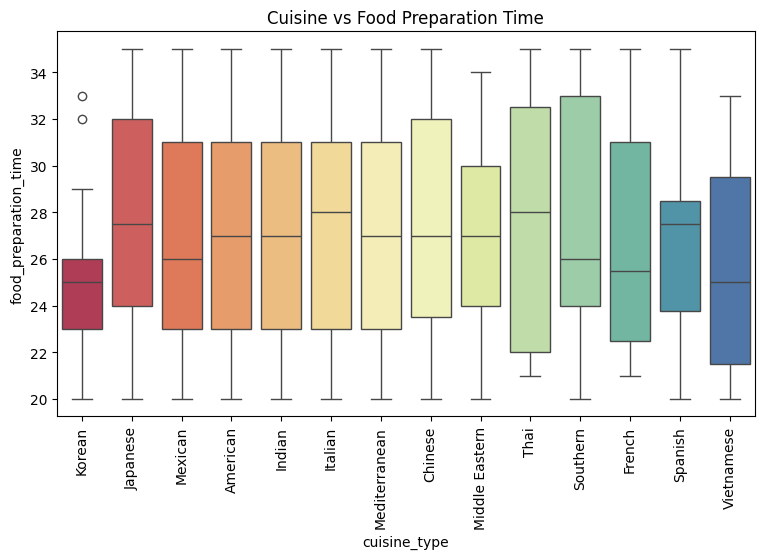

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Food Preparation Time")
plt.xticks(rotation=90)
# plot cuisine and preparation Time
sns.boxplot(x="cuisine_type", y="food_preparation_time", hue="cuisine_type", data=df, palette="Spectral");

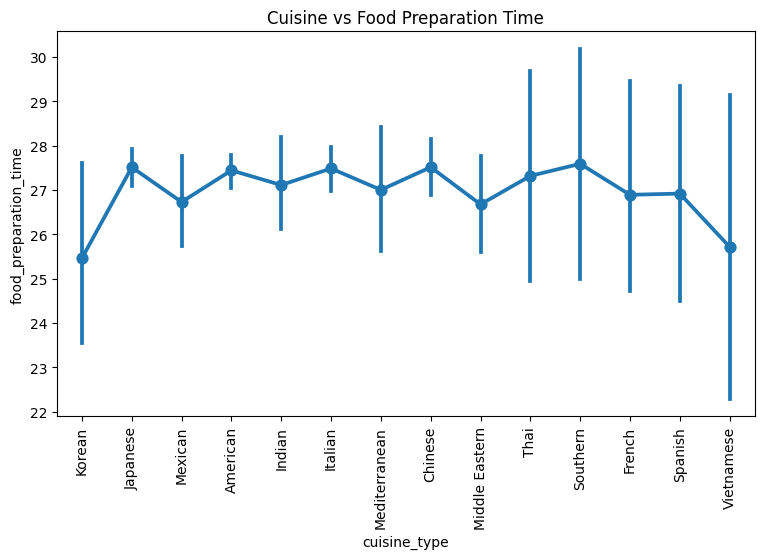

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Food Preparation Time")
plt.xticks(rotation=90)
# plot cuisine and preparation Time and find the central tendency
sns.pointplot(data=df, x="cuisine_type", y="food_preparation_time");

##### Observations:
- *Korean* cuisine preparation time is less than other cuisine

#### Relationship  between Cuisine and Delivery time

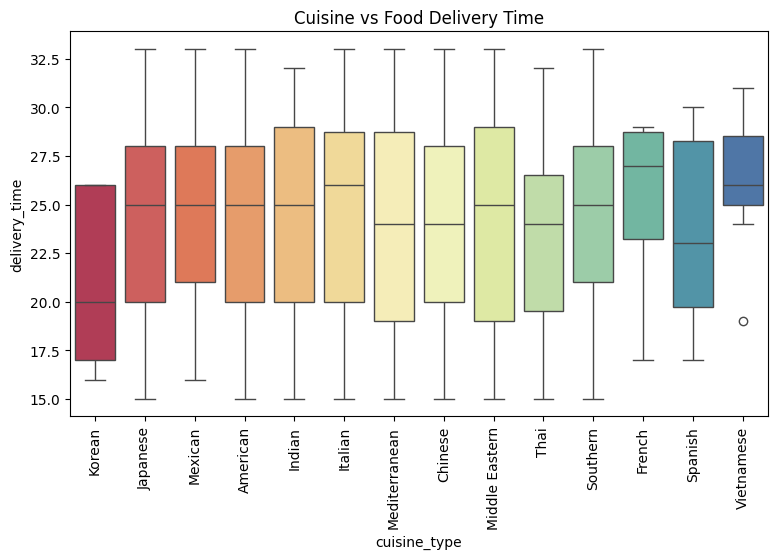

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Food Delivery Time")
plt.xticks(rotation=90)
# plot cuisine and delivery time
sns.boxplot(x="cuisine_type", y="delivery_time", hue="cuisine_type", data=df, palette="Spectral");

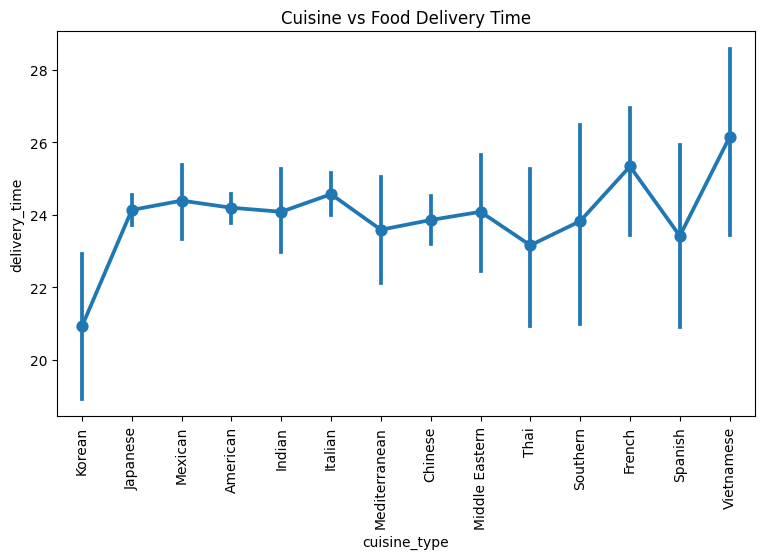

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.title("Cuisine vs Food Delivery Time")
plt.xticks(rotation=90)
# plot cuisine and delivery time and check for the central tendency
sns.pointplot(data=df, x="cuisine_type", y="delivery_time");

##### Observations:
- *Korean* cuisine preparation time is less than other cuisine

#### Relationship between Cuisine, Food Preparation Time, and Delivery Time

In [ ]:
# find the mean of the preparation time and delivery time based on cuisine
df_mean_time = df.groupby(by=['cuisine_type']).mean(numeric_only=True)[["food_preparation_time","delivery_time"]].reset_index().copy()

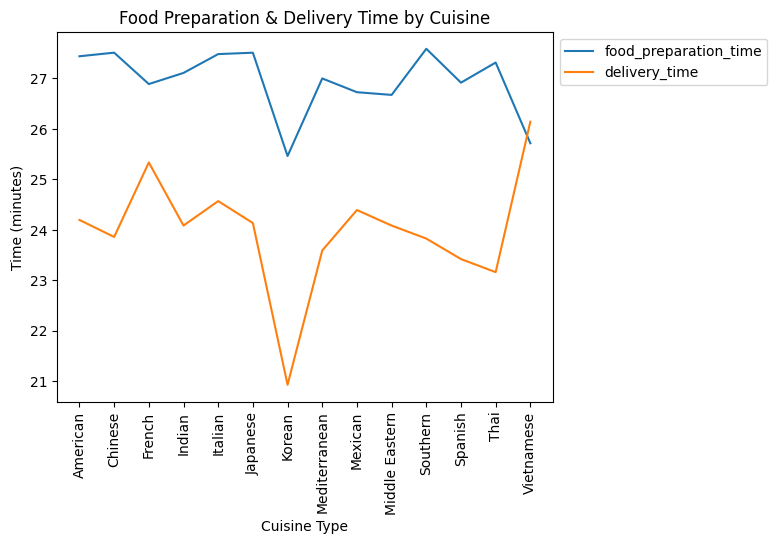

In [ ]:
sns.lineplot(
    x="cuisine_type",
    y="value",  # Use 'value' to accommodate multiple lines
    hue="variable",  # Use 'variable' to distinguish lines based on column names
    data=df_mean_time.melt(id_vars="cuisine_type", var_name="variable", value_name="value"),
    errorbar=('ci', False))

# Customize the plot
plt.legend(bbox_to_anchor=(1,1))
plt.title("Food Preparation & Delivery Time by Cuisine")
plt.xlabel("Cuisine Type")
plt.ylabel("Time (minutes)")
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### Observations
- There seems to be no pattern in the data to connect the delivery and food preparation time
- We can assume the delivery time varies depending on the pickup location to drop location
- We can see from the above plot there are scenarios where the food preparation time is less while the delivery time is more and vice versa.


#### Relationship between Day of the Week and Cost Of Order

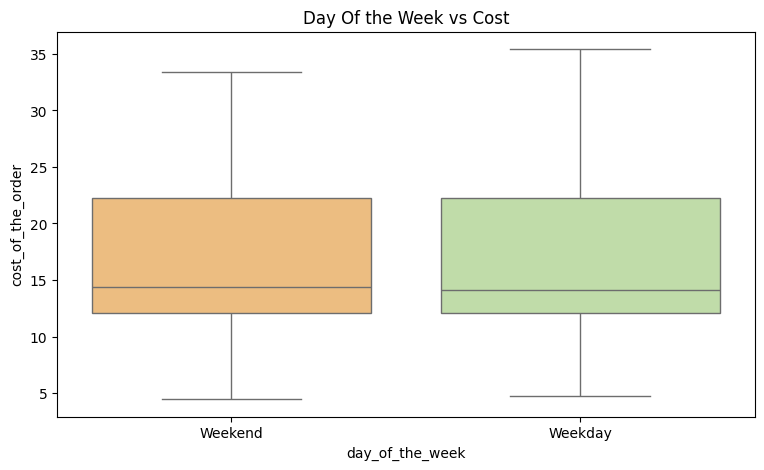

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week vs Cost")
# plot
sns.boxplot(x="day_of_the_week", y="cost_of_the_order", hue="day_of_the_week", data=df, palette="Spectral");

##### Observations:
- From the above plot we can see that there is no major change in price for Weekend or Weekday

#### Relationship between Day of the Week and Food Preparation Time

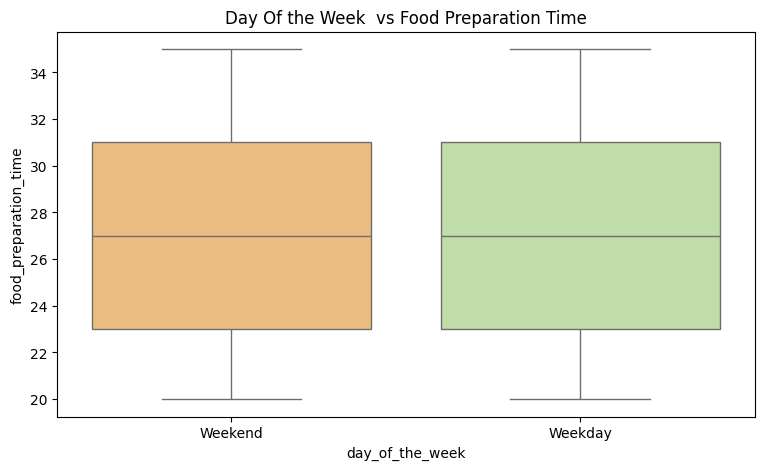

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week  vs Food Preparation Time")
# plot
sns.boxplot(x="day_of_the_week", y="food_preparation_time", hue="day_of_the_week", data=df, palette="Spectral");

##### Observations:
- From the above plot we can say that there is no change in food preparation time for Weekends or Weekday

#### Relationship between Day of the Week and Delivery Time

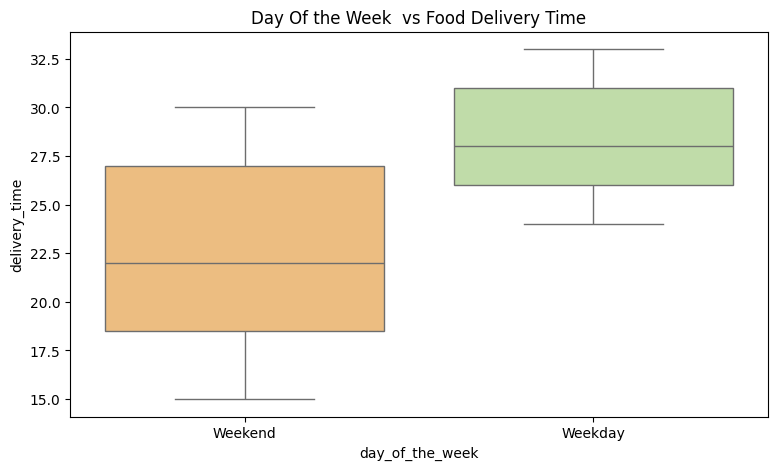

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week  vs Food Delivery Time")
# plot
sns.boxplot(x="day_of_the_week", y="delivery_time", hue="day_of_the_week", data=df, palette="Spectral");

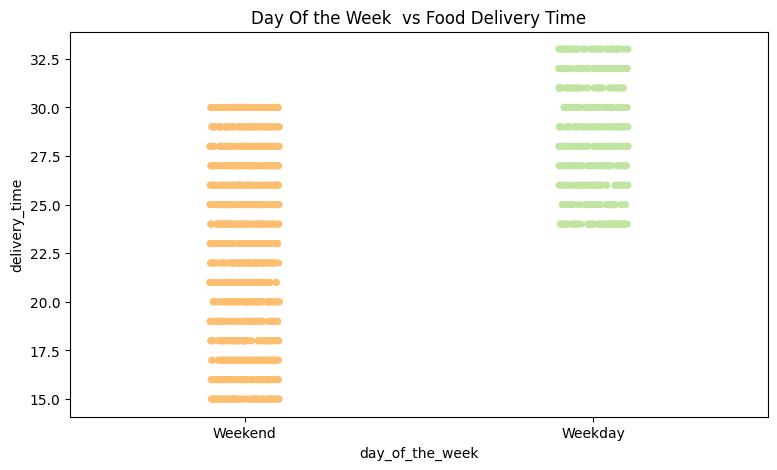

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week  vs Food Delivery Time")
# plot for the underlying distribution
sns.stripplot(x="day_of_the_week", y="delivery_time", hue="day_of_the_week", data=df, jitter=True, palette="Spectral");

##### Observations:
- Food delivery time during weekdays takes longer than on weekends.


#### Relationship between Rating and Delivery Time

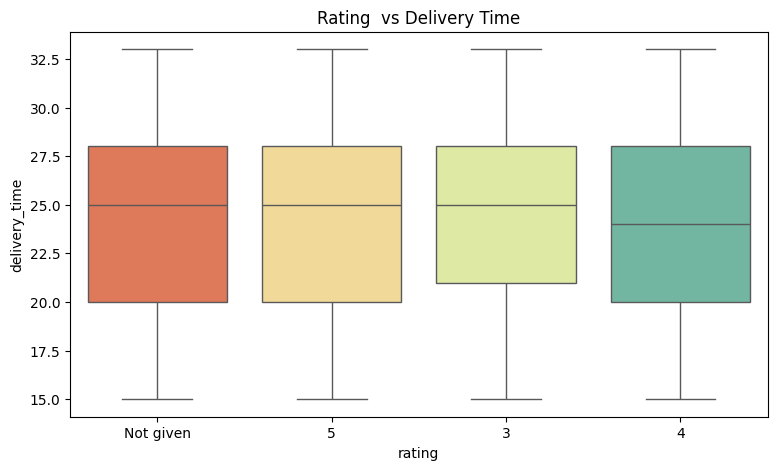

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Rating  vs Delivery Time")
# plot
sns.boxplot(x="rating", y="delivery_time", hue="rating", data=df, palette="Spectral");

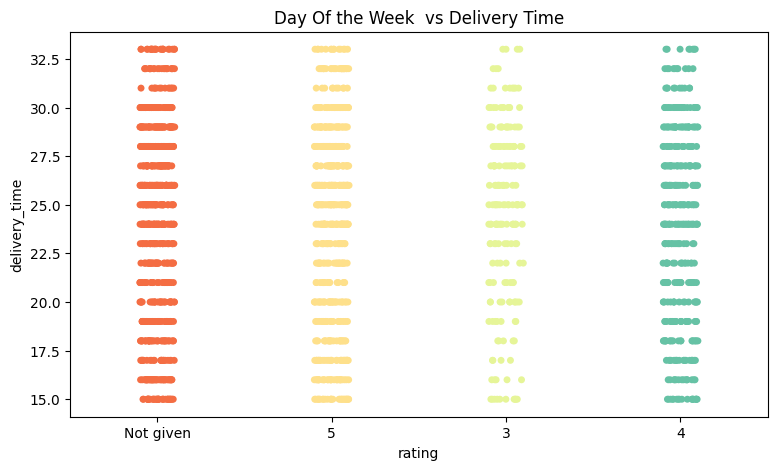

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week  vs Delivery Time")
# plot for the underlying distribution
sns.stripplot(x="rating", y="delivery_time", hue="rating", data=df, jitter=True, palette="Spectral");

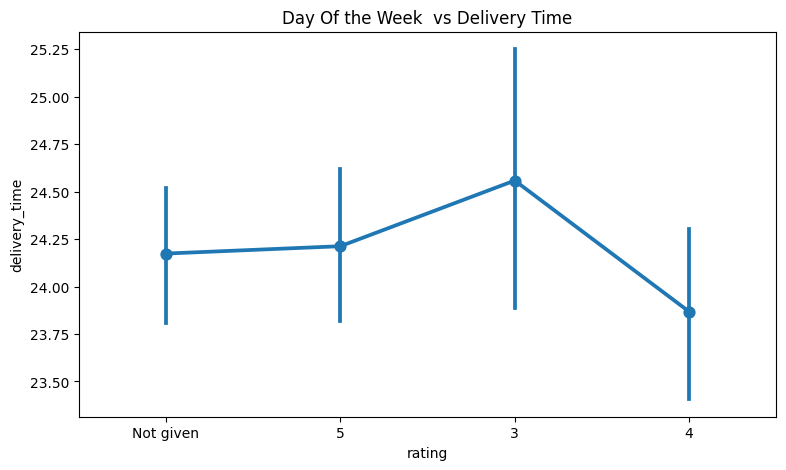

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Day Of the Week  vs Delivery Time")
# plot for the underlying estimate of central tendency
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

##### Observations:
- Food delivery time is not impacting the rating

#### Relationship between Rating and Food Preparation Time

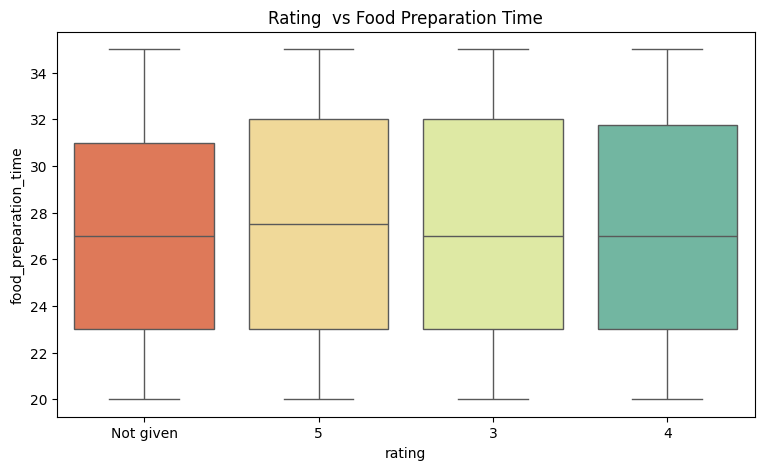

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Rating  vs Food Preparation Time")
# plot
sns.boxplot(x="rating", y="food_preparation_time", hue="rating", data=df, palette="Spectral");

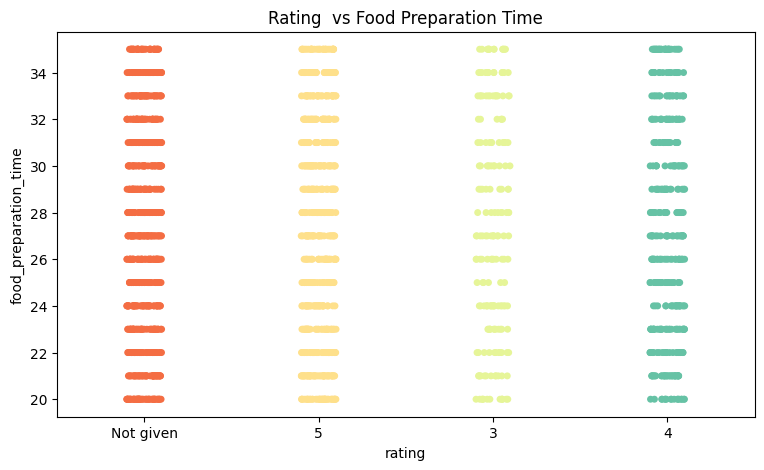

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Rating  vs Food Preparation Time")
# plot for the underlying distribution
sns.stripplot(x="rating", y="food_preparation_time", hue="rating", data=df, jitter=True, palette="Spectral");

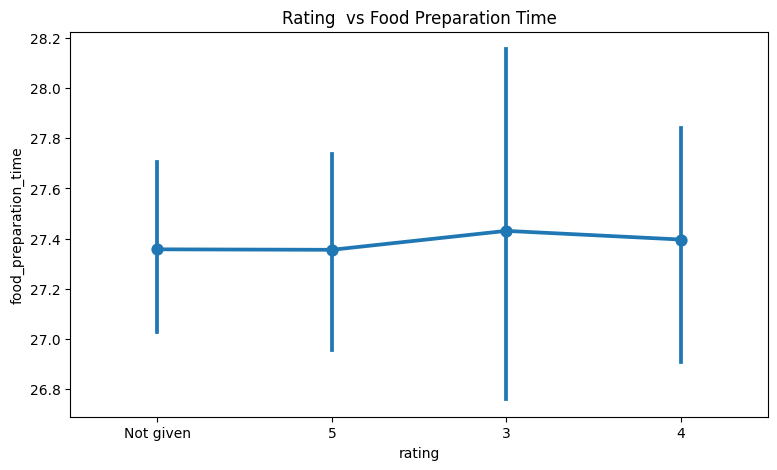

In [ ]:
# Customize the plot
plt.figure(figsize=(9,5))
plt.title("Rating  vs Food Preparation Time")
# plot for the underlying estimate of central tendency
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

##### Observations:
- Food preparation time is also not impacting the rating

#### Compare Cusine with Ratings

In [ ]:
# Distribution of Ratings by Cuisine Type
df_ratingbycusine = df.groupby(['cuisine_type', 'rating']).size().reset_index(name='count').sort_values('rating', ascending=True).copy()

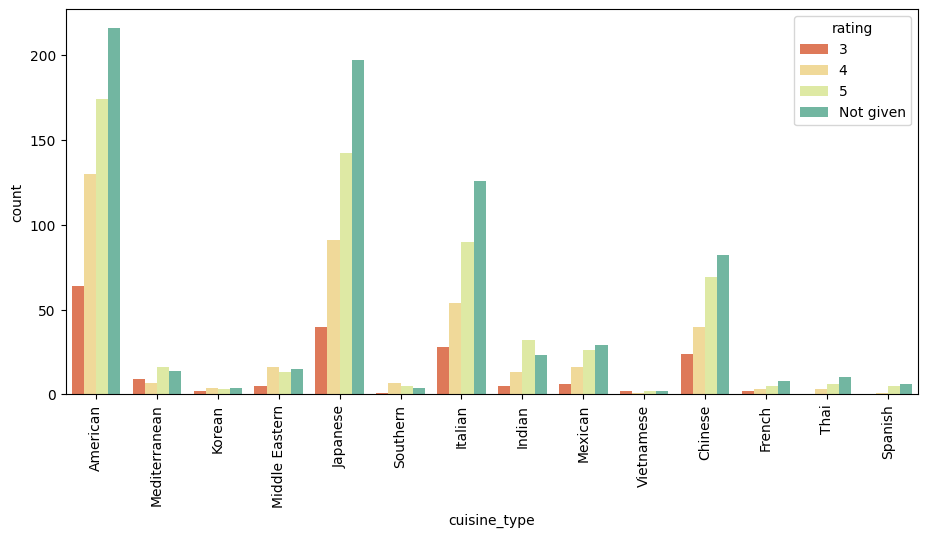

In [ ]:
# customize the plot
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
# plot based on
sns.barplot(df_ratingbycusine, x="cuisine_type",y="count", hue="rating", errorbar=None, palette="Spectral")
plt.legend(title='rating', bbox_to_anchor=(1,1));

##### Observations:
- The above plot shows how the ratings are distributed based on the cuisine.
- The most rated cuisines are American, Japanese, and Italian respectively.


#### Top 10 restaurant and there rating by customer

In [ ]:
# Distribution of Ratings by Top 10 Restaurant
df_ratingbyrestaurant = df_top_10_restaurants.groupby(['restaurant_name', 'rating']).size().reset_index(name='count').sort_values(by=["restaurant_name","count"], ascending=False).copy()

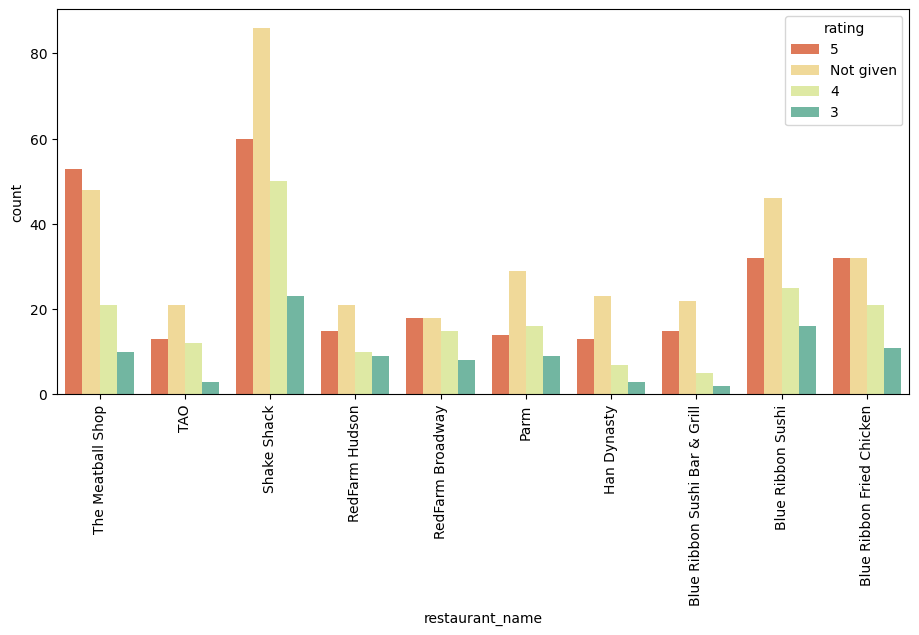

In [ ]:
# customize the plot
plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
# plot
sns.barplot(df_ratingbyrestaurant, x="restaurant_name",y="count", hue="rating", errorbar=None, palette="Spectral")
plt.legend(title='rating', bbox_to_anchor=(1,1));

##### Observations:
- The top 10 restaurants have mixed reviews
- Distribution of rating based on top restaurants are symmetrical

#### Top 10 Restaurant Revenue

In [ ]:
df_restaurantrevenue= df_top_10_restaurants.groupby('restaurant_name')["cost_of_the_order"].sum().reset_index(name='restaurant_revenue').copy()

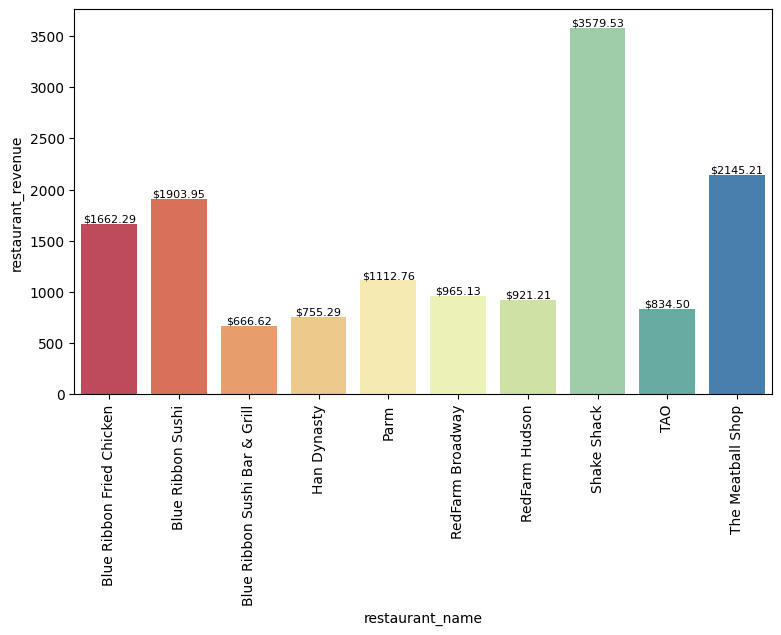

In [ ]:
# customize the plot
plt.figure(figsize=(9,5))
plt.xticks(rotation=90)
# plot
ax= sns.barplot(df_restaurantrevenue, x="restaurant_name",y="restaurant_revenue", errorbar=None, hue="restaurant_name", palette="Spectral");
for container in ax.containers:
  ax.bar_label(container, fontsize=8, fmt="$%.2f")

##### Observations:
- *Shake Shack* has generated the highest revenue from the order placed by the app

In [ ]:
df_restaurant_cuisne = df_top_10_restaurants.groupby(['cuisine_type', 'restaurant_name']).size().reset_index(name='count').sort_values('count', ascending=False).copy()
df_restaurant_cuisne

,cuisine_type,restaurant_name,count
1,American,Shake Shack,219
8,Japanese,Blue Ribbon Sushi,119
7,Italian,The Meatball Shop,112
0,American,Blue Ribbon Fried Chicken,96
6,Italian,Parm,68
4,Chinese,RedFarm Broadway,59
5,Chinese,RedFarm Hudson,55
10,Japanese,TAO,49
3,Chinese,Han Dynasty,46
9,Japanese,Blue Ribbon Sushi Bar & Grill,44


### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filter data to get all the rated restaurant
df_ratedrestaurant = df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer
df_ratedrestaurant['rating'] = df_ratedrestaurant['rating'].astype('int')
# Get the average rating by the restaurant
df_average_rating = df_ratedrestaurant.groupby('restaurant_name')['rating'].mean()

In [ ]:
filtered_df = df_average_rating[(df_average_rating > 4) & (df_ratedrestaurant.groupby('restaurant_name')['rating'].count() > 50)]
print("The restaurants having rating count of more than 50 and the average rating greater than 4\n")
print(filtered_df)

The restaurants having rating count of more than 50 and the average rating greater than 4

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:
- Below are the restaurants having rating greater than 4 and rating count more than 50
  - Blue Ribbon Fried Chicken - 4.328125
  - Blue Ribbon Sushi - 4.219178
  - Shake Shack - 4.278195
  - The Meatball Shop - 4.511905


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
### Calculate the revenue earned by company based on the order
  # Purpose: Business logic for revenue generation
  # Params:
    # cost_of_the_order: dataframe column
def calculate_Revenue(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order*0.25
  elif cost_of_the_order >5:
    return cost_of_the_order*0.15
  else:
    return 0
# assigning earnings in a new column company_revenue
df['company_revenue'] = df['cost_of_the_order'].apply(calculate_Revenue)

In [ ]:
# calculate the sum
sum_company_revenue=df['company_revenue'].sum()
print(f"Net Revenue= ${round(sum_company_revenue,2)}")

Net Revenue= $6166.3


#### Observations:
- Net Revenue generated is $6166.3

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# calculate the total time to deliver food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# get number of rows
t_rows = df['total_time'].shape[0]

In [ ]:
# calculate the percent by filtering total time more than 60 minutes
per_order_60= df[df['total_time']>60].shape[0]/t_rows * 100
print(f"Orders take more than 60 minutes to get delivered from the time the order is placed={round(per_order_60,2)}%")

Orders take more than 60 minutes to get delivered from the time the order is placed=10.54%


#### Observations:
- Total time is calculated by adding up the food_preparation_time and delivery_time
- **Orders that took more than 60 minutes are about 10.54%**

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# calculate mean of weekdays
mean_weekday_delivery_time= round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print(f'The mean delivery time on weekdays is around {mean_weekday_delivery_time} minutes')
# calculate mean of weekends
mean_weekend_delivery_time= round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print(f'The mean delivery time on weekdays is around {mean_weekend_delivery_time} minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


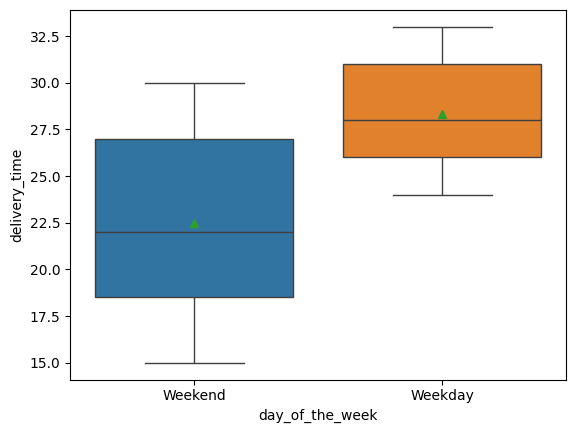

In [ ]:
sns.boxplot(data=df, x="day_of_the_week", y="delivery_time",showmeans=True, hue="day_of_the_week");

#### Observations:
- Delivery time of orders during Weekdays is more than Weekend
- The mean delivery time on weekdays is around 28 minutes
during weekdays is around 22 minutes

### Conclusion and Recommendations

###  What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
We have conducted a thorough analysis of the FoodHub app's order data in the New York location. Specifically, we analyzed 1898 orders to gain insights into the demand of various restaurants and track the overall customer experience. Our goal was to identify patterns and trends in the data that could help FoodHub enhance the app's features and services, ultimately providing an even better experience for both restaurants and customers.

We have been able to conclude that -
 1. The following is a list of the top 5 restaurants that have received the maximum number of orders:
  - Shake Shack
  - The Meatball Shop
  - Blue Ribbon Sushi
  - Blue Ribbon Fried Chicken
  - Parm

2. The top 5 popular cuisines are:
  - American
  - Japanese
  - Italian
  - Chinese
  - Mexican

3. It is important to note that the demand for food orders typically increases on weekends.
4. Approximately 30% of the orders cost more than $20.
5. On average, it takes around 24 minutes to deliver an order.
6. Korean and Vietnamese cuisines are, on average, cheaper than other cuisines.
7. Korean cuisine has a shorter preparation time compared to other cuisines.
8. The delivery time can vary based on the pickup and drop-off locations.
9. Food delivery during weekdays takes longer than on weekends, possibly due to traffic or delivery person availability.
10. Shake Shack has generated the highest revenue from orders placed through the app.
11. About 10.54% of orders took more than 60 minutes to be delivered.
12. About 39% of customers have not provided a rating, but the overall rating on the service is above 4.
13. The rating provided by the user is not influenced by the total time taken for the delivery of the product. This means that even if the delivery took longer than expected, it would not affect the rating given by the user.



### Recommendations:

1. It has been observed that approximately 11% of orders that exceeded the expected delivery time of 60 minutes require further investigation to determine the reason behind the unexpected delay. This analysis helps to identifying the root cause of the delay and taking corrective actions to ensure timely deliveries in the future.
2. To accurately estimate the time it will take for an order to be delivered, it is important to take into account the distance between the restaurant where the food is being prepared and the location where the customer has requested it be delivered. This is because the distance can greatly impact the time it takes for the delivery person to arrive at the drop-off location. Factors such as traffic, and road condition variables can also come into play, and as such, it is important to consider all of these factors when estimating delivery time. By taking all of these factors into account, we can provide a more accurate estimate of delivery time to ensure a satisfactory experience for both the customer and the restaurant.
3. Develop a machine learning model to predict hourly orders, optimize margin, and suggest promotions based on demand to increase revenue.

---